In [1]:
from init_nb import init_notebook
config = init_notebook()
from bold_dementia.connectivity import Atlas, group_by_networks, plot_matrix, reshape_pvalues, block_block
from bold_dementia.utils.iterables import unique
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
from bold_dementia.connectivity import group_groupby


ATLAS = "schaeffer200"
SOFT = False
ALPHA = config["alpha"]
atlas = Atlas.from_name(ATLAS, soft=SOFT)
labels = tuple(sorted(unique(atlas.macro_labels)))

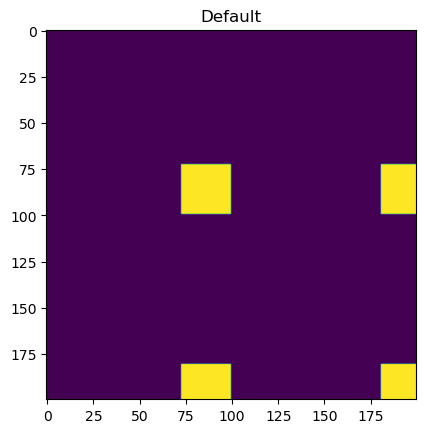

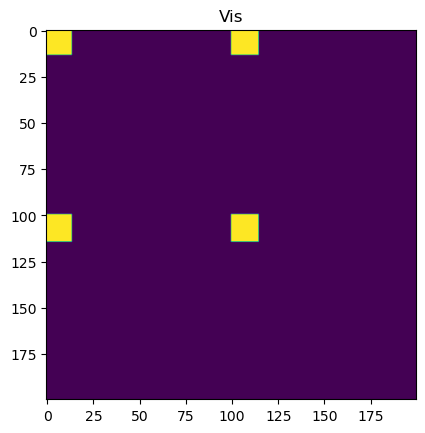

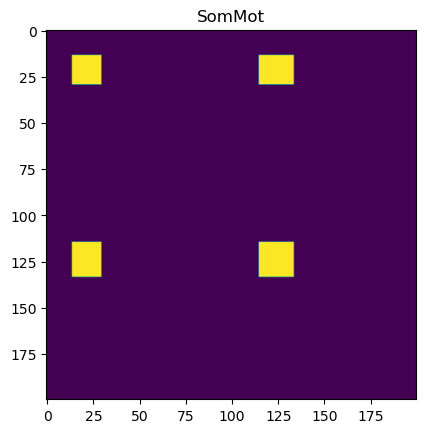

In [2]:
arr = np.array(atlas.macro_labels)
networks = ("Default", "Vis", "SomMot")

matrices = np.zeros((3, 200, 200))
for mat, network in zip(matrices, networks):
    network_idx = np.where(arr == network)[0]
    mat_coords = tuple(product(network_idx, network_idx))
    for coords in mat_coords:
        mat[*coords] = 1
    
    plt.imshow(mat)
    plt.title(network)
    plt.show()



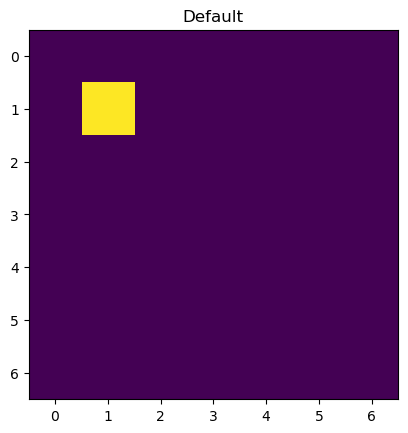

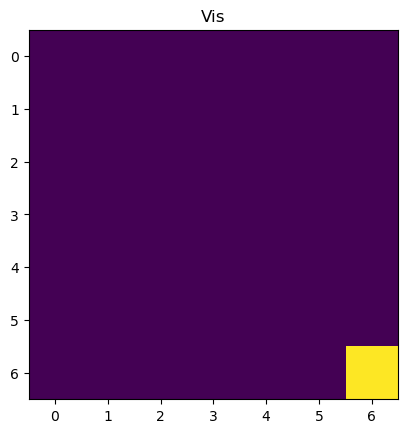

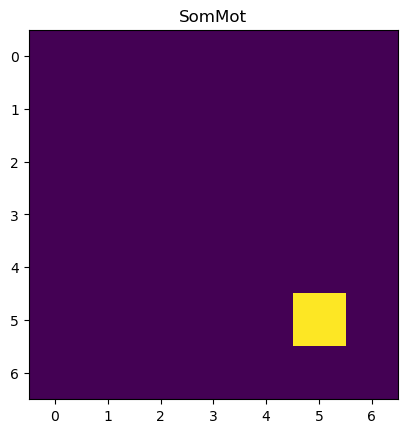

In [3]:
blocks, labels = group_groupby(matrices, atlas)
for block, network in zip(blocks, networks):
    plt.imshow(block)
    plt.title(f"{network}")
    plt.show()